<h2> Coursera Capstone Project - 

</n>
The Battle of Neighborhoods - Final Report



<h2>Scenario and Background</h2>

<br></br>

I am an  IT COnsultant currently residing in Downtown Toronto. I currently live within walking distance to Downtown "Dundas Subway station" therefore I have access to good public transportation to work. Likewise, I enjoy many amenities in the neighborhood, such as international cuisine restaurants, cafes, food shops and entertainment.

I have been offered an opportunity to work in Manhattan, NY. Even though I am looking forward to it, I am a bit nervous about the fact that i need to secure a comparable place to live in Manhattan. Therefore, I decided to apply the learned skills during the Coursera course to explore ways to make sure my decision is factual and rewarding.

Of course, there are alternatives to achieve the answer using available Google and forums, but it rewarding doing it myself with learned tools.

We will start by first importing the libraries required. Then will create a map of the current stay place with venues and stations around. Then do the same for Manhattan and do an analysis to narrow down to a similar place in NY


In [4]:
#Upload all the libraries as needed by this project


import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   

<h2> Problem to be resolved: </h2>

The challenge to resolve is being able to find a rental apartment unit in Manhattan NY that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a rent a unit subject to the following conditions:
Apartment with min 2 bedrooms with monthly rent not to exceed US$5000/month
Unit located within walking distance from a subway metro station in Manhattan
Area with amenities and venues similar to the ones described for current location


<H2>Toronto Downtown Map - Current residence and venues in neighborhood

 The below data is required to compare with Newyork renting place.
    <br></br>

Data of Current Situation

I Currently reside in the neighborhood of 'Bay Street' in Downtown Toronto. And I use Foursquare to identify the venues around the area of residence which are then shown in the Toronto map. These are shown in methodology and execution in section 3.0 .It serves as a reference for comparison with the desired future location in Manhattan NY


In [5]:
# 570 bay street toronto on m5g 0b2 canada
address = '570 Bay Street, Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Toronto home are 43.6551177, -79.383814.


In [6]:
neighborhood_latitude= 43.6551177
neighborhood_longitude= -79.383814

<h2> Use Foursquare - To find venues around current stay

In [7]:
CLIENT_ID = "PDX1CMTTXZN5R2AICP1JD25OOFFPSKVDAAJ1HAPU1U1T4E1Y" # your Foursquare ID
CLIENT_SECRET = "N3KCXJ0LBFI0MPFH5DHPX2CPVVYAGHB1OBSKIKYFL0GISSGF" # your Foursquare Secret
VERSION = "20180405" #PI version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PDX1CMTTXZN5R2AICP1JD25OOFFPSKVDAAJ1HAPU1U1T4E1Y
CLIENT_SECRET:N3KCXJ0LBFI0MPFH5DHPX2CPVVYAGHB1OBSKIKYFL0GISSGF


In [8]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PDX1CMTTXZN5R2AICP1JD25OOFFPSKVDAAJ1HAPU1U1T4E1Y&client_secret=N3KCXJ0LBFI0MPFH5DHPX2CPVVYAGHB1OBSKIKYFL0GISSGF&v=20180405&ll=43.6551177,-79.383814&radius=500&limit=100'

In [9]:
# results display is hidden for report simplification 
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cdc1132dd57970e23362336'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5227bb01498e17bf485e6202-0',
      'venue': {'beenHere': {'count': 0,
        'lastCheckinExpiredAt': 0,
        'marked': False,
        'unconfirmedCount': 0},
       'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
          'suffix': '.png'},
         'id': '4f2a25ac4b909258e854f55f',
         'name': 'Neighborhood',
         'pluralName': 'Neighborhoods',
         'primary': True,
         'shortName': 'Neighborhood'}],
       'contact': {},
       'hereNow': {'count': 0, 'groups': [], 'summary': 'Nobody here'},
       'id': '5227bb01498e17bf485e6202',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
      

<h3>Below is a function that extracts the category of the venues - From the Foursquare lab.

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
venues = results['response']['groups'][0]['items']
TOnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
TOnearby_venues =TOnearby_venues.loc[:, filtered_columns]
# filter the category for each row
TOnearby_venues['venue.categories'] = TOnearby_venues.apply(get_category_type, axis=1)
# clean columns
TOnearby_venues.columns = [col.split(".")[-1] for col in TOnearby_venues.columns]

TOnearby_venues.shape

(100, 4)

Venues near my home in Toronto

In [15]:
#venues nearby

TOnearby_venues.head(10)

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
2,Textile Museum of Canada,Art Museum,43.654396,-79.386500
3,Japango,Sushi Restaurant,43.655268,-79.385165
4,Tsujiri,Tea Room,43.655374,-79.385354
5,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
6,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501
7,The Queen and Beaver Public House,Gastropub,43.657472,-79.383524
8,MUJI,Miscellaneous Shop,43.656024,-79.383284
9,Red Lobster,Seafood Restaurant,43.656328,-79.383621


<h2>Map of Toronto residence with venues in the neighborhood - for reference

In [16]:
latitude=43.6551177
longitude=-79.383814
# create map of Toronto downtwon place  using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(TOnearby_venues['lat'], TOnearby_venues['lng'], TOnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='green',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_to)  
    
map_to

<H2> MANHATTAN NEIGHBORHOODS - DATA AND MAPPING </h2>

<br></br>

This is the step 2 of the process where we prepare a similar map for Manhattan places as well.

<br></br>Cluster neighborhood data was produced with Foursquare as a part of the course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.

In [19]:
#importing the needed libraries

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_35c89f499efc4563864bcff31bc52acf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lMhEkAcy1xJs7RSwOMzb4o_XQ7sGF87EnFuo61M8qmLG',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='Manhattan_Borough.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

df_data_1.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


<h2>Manhattan Borough neighborhoods - data with top 10 clustered venues

In [20]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='Manhattan_Borough_Cluster.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

df_data_2.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Manhattan,Turtle Bay,40.752042,-73.967708,3,Italian Restaurant,Coffee Shop,Steakhouse,Wine Bar,Sushi Restaurant,Hotel,Noodle House,Indian Restaurant,Japanese Restaurant,French Restaurant
36,Manhattan,Tudor City,40.746917,-73.971219,3,Café,Park,Pizza Place,Mexican Restaurant,Greek Restaurant,Sushi Restaurant,Hotel,Deli / Bodega,Diner,Dog Run
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4,Bar,Park,Boat or Ferry,Basketball Court,Coffee Shop,Baseball Field,Gas Station,Beer Garden,Harbor / Marina,Playground
38,Manhattan,Flatiron,40.739673,-73.990947,3,Italian Restaurant,American Restaurant,Gym,Gym / Fitness Center,Yoga Studio,Vegetarian / Vegan Restaurant,Bakery,Clothing Store,Cosmetics Shop,Cycle Studio
39,Manhattan,Hudson Yards,40.756658,-74.000111,2,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


<h2>
Map of Manhattan neighborhoods with top 10 clustered venues </h2>

<br></br>

The popus allow us to identify each neighborhood as well as the cluster of venues around it in order to proceed to examine in more detail 

In [21]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude1= 40.7308619
longitude1= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

<H2> Examining a paticular Cluster - print venues </h2>

<br></br>

After examining several cluster data , I concluded that cluster # 2 & 3 resembles closer to the Toronto place, therefore providing guidance as to where to look for the future apartment .¶

Assign a value to 'kk' to explore a given cluster.

Assign a value to 'kk' to explore a given cluster.

In [22]:
kk = 2
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


<h2> Places to rent in Manhattan</h2>
<br></br>

Map of Manhattan places for rent

Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.

The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an alogrithm and Nominatim.

 Manhattan real estate webs were webscrapped to collect rental data and it was summarized in a csv file for direct reading

In [23]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='rent.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent = pd.read_csv(body)
mh_rent.head()



,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,NaN,NaN


In [25]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2,1500,10000,NaN,NaN


The latitude and longitude data was stored in a csv file for direct upload. since these were already done as a part of prior lab exercise. DOne for simplification reasons

In [26]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='lat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


mh_rent = pd.read_csv(body)

mh_rent.head()



,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


Manhattan Rent

Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim
Data was stored in a csv file for simplifaction report purposes and saving code processing time in future.¶

In [27]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='rent-lat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent = pd.read_csv(body)
mh_rent.head()



,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299


<h2>Manhattan apartment rent price statistics</h2>
<br></br>
A US 7000 Dollar per month rent is actually around the mean value - similar to Toronto! :)

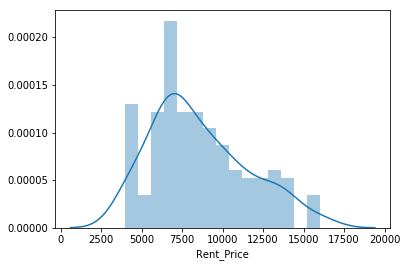

In [28]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

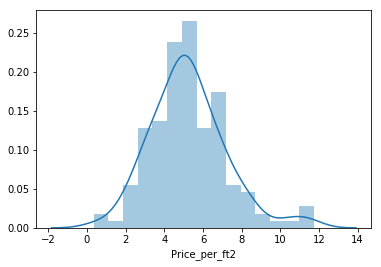

In [29]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


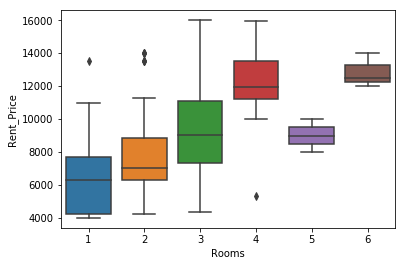

In [30]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

<h2> Manhattan Rent place - Map </h2>
<br></br>

The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max US7000 )

In [31]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude2= 40.7308619
longitude2= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude2, longitude2], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

<h2>Map of Manhattan showing the places for rent and the cluster of venues</h2>
<br></br>
Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.
<br></br>
This is an insightful way to explore rental possibilites
    

In [33]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

<h2> Now one can explore a particular rental place and its venues in detail</h2>

</br>
In the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it.
We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station

In [35]:
## kk is the cluster number to explore
kk = 3
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


<h2>Mapping Manhattan Subway locations</h2>

Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit. 

For simplification, a csv file was produced from the 'numbers' so that the reading of this file is the starting point here. The geodata will be obtain via Nominatim using the algorithm below

In [36]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='subwaylist.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

subway = pd.read_csv(body)
subway.head()



,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


Add colums labeled 'lat' and 'long' to be filled with geodata

In [37]:
sLength = len(subway['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
subway = subway.assign(lat=lat.values)
subway = subway.assign(long=long.values)

</h2> Algorithm to find latitude and longitud for each subway metro station and add them to dataframe </h2>

Read csv file that produced the subway stations list with geodata

In [38]:
# directly consuming lat and long of stations from csv file
body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='subway.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sub = pd.read_csv(body)
sub.head()



,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [39]:
# removing duplicate rows 
sub1=sub.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
sub1.shape

(22, 4)

In [40]:
sub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


<h2>MAP of Manhattan showing the location of subway stations </b>

In [41]:
latitude=40.7308619
longitude=-73.9871558

map_sub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(sub1['lat'], sub1['long'],  sub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='yellow',
        fill_color='yellow',
        fill_opacity=2.5,
    ).add_to(map_sub1) 
map_sub1

<h2>Map of Manhattan showing places for rent and the subway locations nearby</h2>
<br></br>
Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station

In [42]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299


In [43]:
# create map of Manhattan

latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(sub1['lat'], sub1['long'],  sub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

<h3>Overall Manhattan Map with all details obtained above. This will help us in making a selection<h3>
    
<h2> ONE CONSOLIDATED MAP </h2>

Let's consolidate all the required inforamtion to make the apartment selection in one map. Map of Manhattan with rental places, subway locations and cluster of venues

<h2>
Red - SUbway
Blue - Apartments
Bubbles - Clusters of venues</h2>

In [44]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_overall = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_overall) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(sub1['lat'], sub1['long'],  sub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_overall) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_overall)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_overall.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_overall)

map_mh_overall

<h3> Problem Resolution - Select the apartment for rent </h3>

<br> </br>

The above consolidate map was used to explore options.

After examining, I have chosen two locations that meet the requirements which will assess to make a choice.

<h2>

Apartment 1: 305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2 Monthly rent : 7500 Dollars

Apartment 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3 Monthly rent : 6935 Dollars

<h3>Venues for Apartment 1 - Cluster 2
    

In [45]:
## kk is the cluster number to explore
kk = 1
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Wine Bar,Gastropub,Jazz Club,Park,Bakery,American Restaurant,French Restaurant


<h3> Venues for Apartment 2 - Cluster 3

In [46]:
kk = 3
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


<h3> Apartment Selection </h3>
<br></br>

Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

Apartment 1 rent cost is US7500 slightly above the US7000 budget. Apt 1 is located 400 meters from subway station at 59th Street and work place ( Park Ave and 53rd) is another 600 meters way. I can walk to work place and use subway for other places aroung. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.

Apartment 2 rent cost is US6935, just under the US7000 budget. Apt 2 is located 60 meters from subway station at Fulton Street, but I will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster 3.

Based on current Toronto venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that APARTMENT 1 is a better choice since the extra monthly rent is worth the conveniences it provides.

<h3> Thanks